In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
import string
from datetime import timedelta

Instead of just searching for just the word "bot," we want to search for reviews that mention all bot related things.

In [2]:
#Basic word list
bot_words = ['bot','robot']

#A little bit more of a liberal take on what can be defined as a bot
bot_words_ext = ['bot','robot','scam','fake','spam','scan','cat fish','catfish']

In [3]:
sent_tinder = pd.read_csv('/Users/isaacwisthuff/Box/ACE_592_Dating_Sim/Clean_Data/sent_time_Tinder.csv')
sent_hinge = pd.read_csv('/Users/isaacwisthuff/Box/ACE_592_Dating_Sim/Clean_Data/sent_time_Hinge.csv')
sent_bumble = pd.read_csv('/Users/isaacwisthuff/Box/ACE_592_Dating_Sim/Clean_Data/sent_time_Bumble.csv')

In [4]:
def word_search(df):
    df.drop(columns=['Unnamed: 0'])

    #Removes stopwords
    from nltk.corpus import stopwords
    stopwords=stopwords.words('english')

    #I have no idea why it's interpreting clean_text as a float, but casting to a string gets rid of my type error
    df['clean_text'] = df['clean_text'].apply(lambda x: str(x))

    df['words'] = [list(set(x) - set(stopwords)) for x in df['clean_text']]

    #Basic word list
    bot_words = ['bot','robot']

    #A little bit more of a liberal take on what can be defined as a bot
    bot_words_ext = ['bot','robot','scam','fake','spam','scan','cat fish','catfish']


    #Turning clean text into a list of words
    df['words'] = [x.split(" ") for x in df['clean_text']]

    #Searching for mentions of bot or robot, then other words
    df['bot'] = df['clean_text'].str.contains("bot|robot",case=False)
    df['liberal_bot'] = df['clean_text'].str.contains('bot|robot|scam|fake|spam|scan|cat fish|catfish',case=False)

    return df
    

In [5]:
searched_bumble = word_search(sent_bumble)
searched_hinge = word_search(sent_hinge)
searched_tinder = word_search(sent_tinder)

In [26]:
searched_bumble

,Unnamed: 0,userName,full_text,clean_text,score,thumbs,date,time_stamp,reply_status,reply_content,comp_sent,neg_sent,pos_sent,neu_sent,words,bot,liberal_bot,month_year
1039,1039,Alex Ortiz,It's okay but I like sex and p****,its okay but i like sex and p,5,0,2022-03-31,2022-03-31 23:08:54,False,NaN,0.5719,0.000,0.540,0.460,"[its, okay, but, i, like, sex, and, p]",False,False,2022-03
1040,1040,ReeferTJ A,Useless unless you wanna pay,useless unless you wanna pay,2,1,2022-03-31,2022-03-31 23:03:18,True,All of our core features are free to use. You ...,-0.4939,0.583,0.000,0.417,"[useless, unless, you, wanna, pay]",False,False,2022-03
1041,1041,Sandrine Sobel,I am on bumble I asked Fot men no more than 20...,i am on bumble i asked fot men no more than 20...,1,1,2022-03-31,2022-03-31 22:47:11,True,Hi Sandrine! We're sorry about this. Can you p...,-0.0396,0.135,0.131,0.734,"[i, am, on, bumble, i, asked, fot, men, no, mo...",False,False,2022-03
1042,1042,Sharon Talisa,App Started getting real suspicious with block...,app started getting real suspicious with block...,1,0,2022-03-31,2022-03-31 22:07:58,False,NaN,0.8705,0.050,0.161,0.789,"[app, started, getting, real, suspicious, with...",False,False,2022-03
1043,1043,M Ali,Good app,good app,4,0,2022-03-31,2022-03-31 22:06:56,True,Thanks for letting us know we’re on the right ...,0.4404,0.000,0.744,0.256,"[good, app]",False,False,2022-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90370,90370,A Google user,"Requires Facebook to sign up, I don't own a Fa...",requires facebook to sign up i dont own a face...,1,1,2018-01-01,2018-01-01 06:15:56,False,NaN,0.0000,0.000,0.000,1.000,"[requires, facebook, to, sign, up, i, dont, ow...",False,False,2018-01
90371,90371,Shania Marie,How do you message people? It's not letting me.,how do you message people its not letting me,3,0,2018-01-01,2018-01-01 05:02:05,True,Hi Shania! Please message us on Facebook (@bum...,0.0000,0.000,0.000,1.000,"[how, do, you, message, people, its, not, lett...",False,False,2018-01
90372,90372,Michael Soulantzos,Get rid of the facebork login. A lot of people...,get rid of the facebork login a lot of people ...,1,0,2018-01-01,2018-01-01 04:02:50,False,NaN,0.3818,0.000,0.106,0.894,"[get, rid, of, the, facebork, login, a, lot, o...",False,False,2018-01
90373,90373,Laiza Android,Would of liked it if you weren't forced to con...,would of liked it if you werent forced to conn...,2,1,2018-01-01,2018-01-01 00:45:06,True,Hi Liza! Right now we use Facebook to pull imp...,0.6463,0.000,0.346,0.654,"[would, of, liked, it, if, you, werent, forced...",False,False,2018-01


In [6]:
#Bot mention stats
print('Bot/robot mention rates:')
print('Hinge: ' , round(len(searched_hinge[searched_hinge.bot == True])/len(searched_hinge)*100, 3), '%')
print('Bumble: ' , round(len(searched_hinge[searched_bumble.bot == True])/len(searched_bumble)*100, 3), '%')
print('Tinder: ' , round(len(searched_hinge[searched_tinder.bot == True])/len(searched_tinder)*100, 3), '%')
print()
print('Inclusive bot word mention rates:')
print('Hinge: ' , round(len(searched_hinge[searched_hinge.liberal_bot == True])/len(searched_hinge)*100, 3), '%')
print('Bumble: ' , round(len(searched_hinge[searched_bumble.liberal_bot == True])/len(searched_bumble)*100, 3), '%')
print('Tinder: ' , round(len(searched_hinge[searched_tinder.liberal_bot == True])/len(searched_tinder)*100, 3), '%')

Bot/robot mention rates:
Hinge:  2.086 %
Bumble:  1.515 %
Tinder:  0.555 %

Inclusive bot word mention rates:
Hinge:  7.261 %
Bumble:  4.833 %
Tinder:  1.925 %


/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/2339148950.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Bumble: ' , round(len(searched_hinge[searched_bumble.bot == True])/len(searched_bumble)*100, 3), '%')
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/2339148950.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Tinder: ' , round(len(searched_hinge[searched_tinder.bot == True])/len(searched_tinder)*100, 3), '%')
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/2339148950.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Bumble: ' , round(len(searched_hinge[searched_bumble.liberal_bot == True])/len(searched_bumble)*100, 3), '%')
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/2339148950.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Tinder: ' , round

In [8]:
#Creating a list to make operations easier
reviews = [searched_bumble, searched_hinge, searched_tinder]

Looks like Hinge has the largest percentage of bot mentions. Lets see what this looks like over time!

In [9]:
#converts the time_stamp and date columns to datetime64 types
def datetime(df):

    df['date'] = pd.to_datetime(df.date)
    
    df['month_year'] = df['date'].apply(lambda x:  str(x)[:-12])

    df['time_stamp'] = pd.to_datetime(df['time_stamp'])
    df_data = df.loc[df['score'] != 0]

    return df_data

In [10]:
for i in reviews:
    i = datetime(i)

In [11]:
df_graph = pd.DataFrame(columns=['month_year','bumble_bot','hinge_bot','tinder_bot'])
months = reviews[0]
df_graph['month_year'] = months['month_year'].unique()
df_graph

grouped_all = searched_bumble[searched_bumble['bot'] == False].groupby('month_year')['bot'].count().reset_index()

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
Name: bumble_bot, dtype: object

In [12]:
#Creating a graphing set with monthly bot concentrations for each app dataset
def monthly_reviews(list_df, df_graph):
    count = 1
    for df in list_df:
        grouped = df[df['bot'] == True].groupby('month_year')['bot'].count().reset_index()
        grouped_all = df.groupby('month_year')['bot'].count().reset_index()
        df_graph.iloc[:, count] = grouped['bot']/grouped_all['bot']
        count+=1

    return df_graph.sort_values(by='month_year').reset_index().drop(columns = ['index'])



In [13]:
fun = monthly_reviews(reviews, df_graph)

In [14]:
searched_bumble = searched_bumble[searched_bumble['date'] <= '2022-03-31']
searched_hinge = searched_hinge[searched_hinge['date'] <= '2022-03-31']
searched_tinder = searched_tinder[searched_tinder['date'] <= '2022-03-31']

In [35]:
searched_tinder

,Unnamed: 0,userName,full_text,clean_text,score,thumbs,date,time_stamp,reply_status,reply_content,comp_sent,neg_sent,pos_sent,neu_sent,words,bot,liberal_bot,month_year
1425,1425,Nawaf /,كلهم قبيحين وتبندوني ليش,كلهم قبيحين وتبندوني ليش,1,0,2022-03-31,2022-03-31 22:48:17,False,NaN,0.0000,0.000,0.000,1.000,"[كلهم, قبيحين, وتبندوني, ليش]",False,False,2022-03
1426,1426,Frank Ruiz,It's been great.,its been great,1,0,2022-03-31,2022-03-31 22:43:55,False,NaN,0.6249,0.000,0.672,0.328,"[its, been, great]",False,False,2022-03
1427,1427,Marta Michalczuk,do not download 😒 😑,do not download 😒 😑,1,0,2022-03-31,2022-03-31 22:39:10,False,NaN,0.0000,0.000,0.000,1.000,"[do, not, download, 😒, 😑]",False,False,2022-03
1428,1428,M N,App admins don't do anything after I report bo...,app admins dont do anything after i report bot...,1,2,2022-03-31,2022-03-31 22:18:14,False,NaN,-0.1945,0.138,0.104,0.758,"[app, admins, dont, do, anything, after, i, re...",True,True,2022-03
1429,1429,Brenna Battey,Pretty sure my tinder got hacked and now I am ...,pretty sure my tinder got hacked and now i am ...,1,0,2022-03-31,2022-03-31 22:10:51,False,NaN,-0.0516,0.331,0.320,0.349,"[pretty, sure, my, tinder, got, hacked, and, n...",False,False,2022-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303642,303643,Brooke Horwood,Its more easy to find someone you love,its more easy to find someone you love,5,0,2018-01-01,2018-01-01 00:42:08,False,NaN,0.8122,0.000,0.552,0.448,"[its, more, easy, to, find, someone, you, love]",False,False,2018-01
303643,303644,Sean Bispo,Great,great,5,0,2018-01-01,2018-01-01 00:12:10,False,NaN,0.6249,0.000,1.000,0.000,[great],False,False,2018-01
303644,303645,Evan Morrison,I pay over $30 per month and you still BLAST M...,i pay over 30 per month and you still blast me...,1,14,2018-01-01,2018-01-01 00:08:06,False,NaN,-0.1779,0.172,0.000,0.828,"[i, pay, over, 30, per, month, and, you, still...",False,False,2018-01
303645,303646,Scott Jessee,Good way to meet ppl,good way to meet ppl,5,0,2018-01-01,2018-01-01 00:06:10,False,NaN,0.4404,0.000,0.420,0.580,"[good, way, to, meet, ppl]",False,False,2018-01


In [15]:
#changing month_year to datetime for graphing purposes
fun['month_year'] = pd.to_datetime(fun['month_year'])

In [22]:
fun.at[0, 'hinge_bot'] = 3/150
fun

,month_year,bumble_bot,hinge_bot,tinder_bot
0,2018-01-01,0.028874,0.020000,0.030175
1,2018-02-01,0.032571,0.009535,0.034210
2,2018-03-01,0.025457,0.047486,0.034249
3,2018-04-01,0.029229,0.020713,0.032416
4,2018-05-01,0.021446,0.031915,0.030230
5,2018-06-01,0.024962,0.030479,0.027537
6,2018-07-01,0.029116,0.034954,0.030119
7,2018-08-01,0.032967,0.018284,0.032285
8,2018-09-01,0.026128,0.032637,0.033895
9,2018-10-01,0.028914,0.033962,0.031167


Text(0.5, 1.0, 'Mentions of "Bot" or "Robot" in the Reviews of Several Dating Apps \n (Jan-2018, April-2022)')

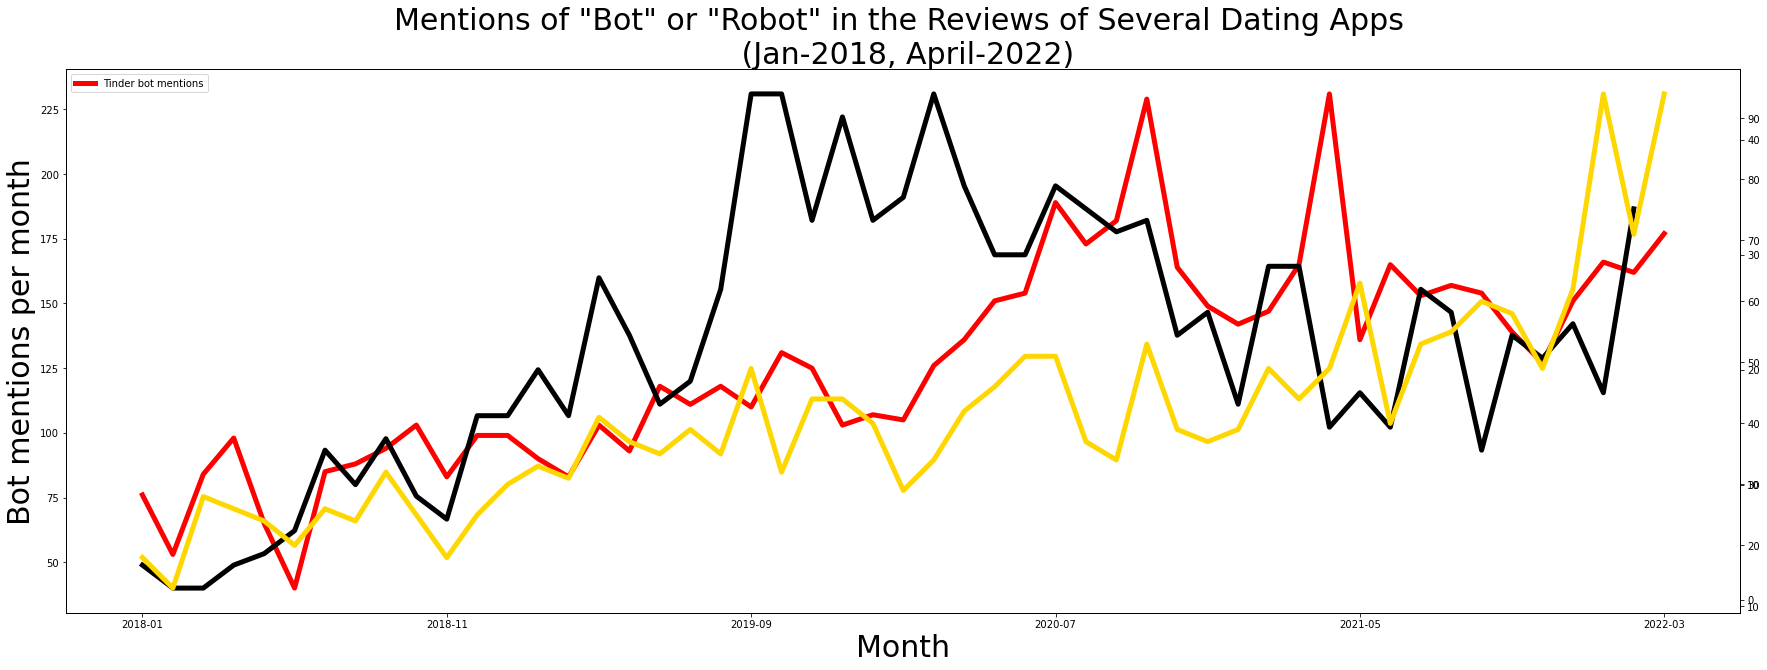

In [23]:
#Raw review count bot mentions

f,a = plt.subplots(figsize=(30,10))

searched_tinder[searched_tinder['bot']==True].groupby('month_year')['bot'].count().plot(ax=a, 
color='red',
linewidth=5, 
label="Tinder bot mentions")
plt.ylabel("Bot mentions per month", fontsize=30,color='black')
plt.xlabel("Month", fontsize=30,color='black')


a2 = a.twinx()

searched_hinge[searched_hinge['bot']==True].groupby('month_year')['bot'].count().plot(ax=a2, 
color='black',
linewidth=5, 
label="Hinge bot mentions")


a3 = a.twinx()

searched_bumble[searched_bumble['bot']==True].groupby('month_year')['bot'].count().plot(ax=a3, 
color='gold',
linewidth=5, 
label="Bumble bot mentions")

handles, labels = a.get_legend_handles_labels()
a.legend(handles, labels, loc='upper left')

plt.title('Mentions of "Bot" or "Robot" in the Reviews of Several Dating Apps \n (Jan-2018, April-2022)', fontsize=30)



Text(0.5, 1.0, 'Mentions of "Bot" Related Words in the Reviews of Several Dating Apps \n (Jan-2018, April-2022)')

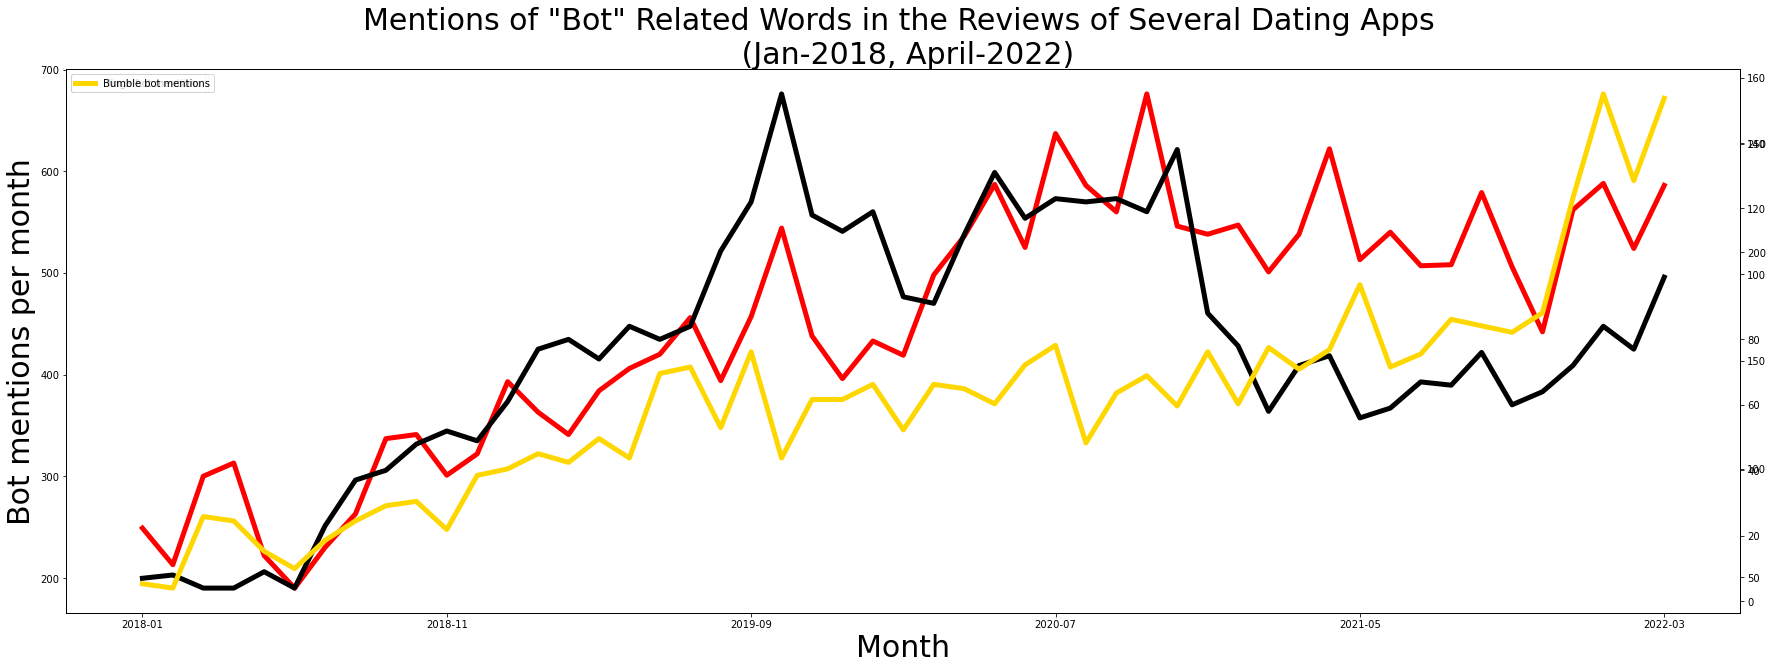

In [19]:
#Raw review count liberal bot mentions

f,a = plt.subplots(figsize=(30,10))

searched_tinder[searched_tinder['liberal_bot']==True].groupby('month_year')['liberal_bot'].count().plot(ax=a, 
color='red',
linewidth=5, 
label="Tinder bot mentions")
plt.legend(loc='upper left')
plt.ylabel("Bot mentions per month", fontsize=30,color='black')
plt.xlabel("Month", fontsize=30,color='black')

a2 = a.twinx()

searched_hinge[searched_hinge['liberal_bot']==True].groupby('month_year')['liberal_bot'].count().plot(ax=a2, 
color='black',
linewidth=5, 
label="Hinge bot mentions")
plt.legend(loc='upper left')


a3 = a.twinx()

searched_bumble[searched_bumble['liberal_bot']==True].groupby('month_year')['liberal_bot'].count().plot(ax=a3, 
color='gold',
linewidth=5, 
label="Bumble bot mentions")
plt.legend(loc='upper left')

plt.title('Mentions of "Bot" Related Words in the Reviews of Several Dating Apps \n (Jan-2018, April-2022)', fontsize=30)

/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/3581534744.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x1 = np.datetime64("2019-01-31 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/3581534744.py:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  q = np.datetime64("2019-03-01 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/3581534744.py:28: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x2 = np.datetime64("2020-04-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/3581534744.py:29: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x3 = np.datetime64("2020-12-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0

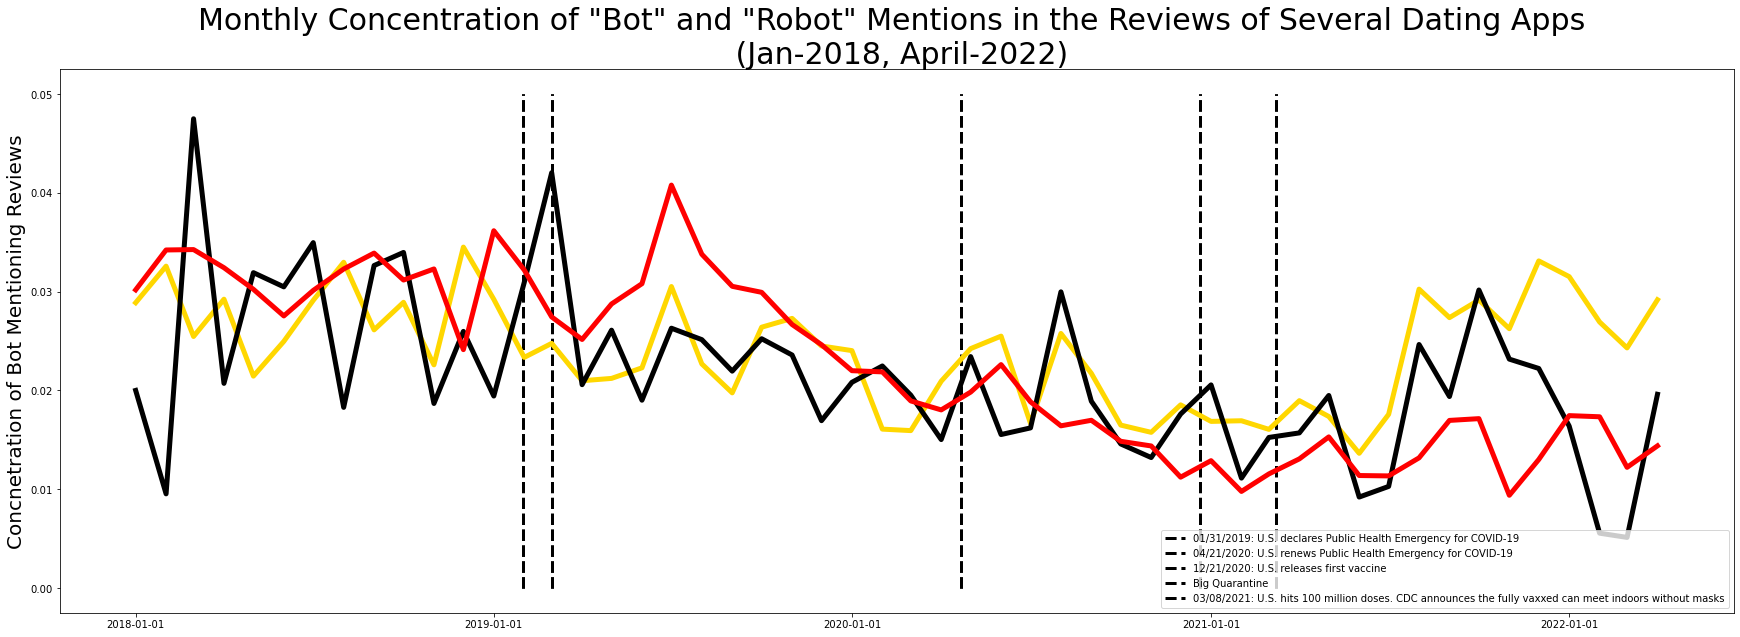

In [25]:
#Concentration liberal bot mentions
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))

x = fun['month_year']
y = fun['bumble_bot']
y2 = fun['hinge_bot']
y3 = fun['tinder_bot']

bum_plot = ax.plot(x, y, color='gold',linewidth=5, label="Bumble bot mentions")
hing_plot = ax.plot(x, y2, color='black',linewidth=5,label="Hinge bot mentions")
tin_plot = ax.plot(x, y3, color='red',linewidth=5, label="Tinder bot mentions")

plt.legend( loc='upper left')

plt.ylabel("Concnetration of Bot Mentioning Reviews", fontsize=20,color='black')

plt.xticks(['2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=10)

plt.title('Monthly Concentration of "Bot" and "Robot" Mentions in the Reviews of Several Dating Apps \n (Jan-2018, April-2022)', fontsize=30)

#important dates 

#vertical lines dates
x1 = np.datetime64("2019-01-31 00:00:00+00:00")
q = np.datetime64("2019-03-01 00:00:00+00:00")
x2 = np.datetime64("2020-04-21 00:00:00+00:00")
x3 = np.datetime64("2020-12-21 00:00:00+00:00")
x4 = np.datetime64("2021-03-08 00:00:00+00:00")

#US declares COVID emergency
x1_l = plt.vlines(x1, 0, 0.05, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.05, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.05, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#big quarantine 
q_l = plt.vlines(q, 0, 0.05, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.05, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.05, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')

#renewed emergency call
x2_l = plt.vlines(x2, 0, 0.05, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.05, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.05, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#vaccines drop first doses
x3_l = plt.vlines(x3, 0, 0.05, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.05, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.05, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')

#CDC announces fully vaxxed can meet inside without masks 
x4_l = plt.vlines(x4, 0, 0.05, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.05, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.05, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')

plt.legend(handles= [x1_l, x2_l, x3_l, q_l, x4_l], loc='lower right')


plt.show()


In [27]:
#Creating a graphing set with monthly bot concentrations for each app dataset
def monthly_reviews_lib(list_df, df_graph):
    count = 1
    for df in list_df:
        grouped = df[df['liberal_bot'] == True].groupby('month_year')['liberal_bot'].count().reset_index()
        grouped_all = df.groupby('month_year')['liberal_bot'].count().reset_index()
        df_graph.iloc[:, count] = grouped['liberal_bot']/grouped_all['liberal_bot']
        count+=1

    return df_graph.sort_values(by='month_year').reset_index().drop(columns = ['index'])

In [30]:
fun_2 = monthly_reviews_lib(reviews, df_graph)

#changing month_year to datetime for graphing purposes
fun_2['month_year'] = pd.to_datetime(fun_2['month_year'])

In [99]:
searched_tinder[searched_tinder['bot']==True]

,Unnamed: 0,userName,full_text,clean_text,score,thumbs,date,time_stamp,reply_status,reply_content,comp_sent,neg_sent,pos_sent,neu_sent,words,bot,liberal_bot,month_year
1428,1428,M N,App admins don't do anything after I report bo...,app admins dont do anything after i report bot...,1,2,2022-03-31,2022-03-31 22:18:14,False,NaN,-0.1945,0.138,0.104,0.758,"[app, admins, dont, do, anything, after, i, re...",True,True,2022-03
1432,1432,Aiden Bridges,Between bots and the ones advertising onlyfans...,between bots and the ones advertising onlyfans...,1,0,2022-03-31,2022-03-31 21:47:19,False,NaN,0.3252,0.000,0.109,0.891,"[between, bots, and, the, ones, advertising, o...",True,True,2022-03
1438,1438,Noah Rodriguez,"it works, you just gotta play the algorithm. h...",it works you just gotta play the algorithm how...,3,0,2022-03-31,2022-03-31 19:18:38,False,NaN,0.3400,0.073,0.139,0.788,"[it, works, you, just, gotta, play, the, algor...",True,True,2022-03
1439,1439,James F,"Had for nearly 5 years now, only like 15 likes...",had for nearly 5 years now only like 15 likes ...,1,2,2022-03-31,2022-03-31 18:48:18,False,NaN,0.7862,0.000,0.169,0.831,"[had, for, nearly, 5, years, now, only, like, ...",True,True,2022-03
1453,1453,Phaze 101,APP SUCKS. Not only did I come back to my acco...,app sucks not only did i come back to my accou...,1,0,2022-03-31,2022-03-31 16:39:36,False,NaN,0.0931,0.148,0.141,0.711,"[app, sucks, not, only, did, i, come, back, to...",True,True,2022-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303318,303319,Saifuddin Faiz,"I had applied for subscription , the money was...",i had applied for subscription the money was ...,1,0,2018-01-02,2018-01-02 21:27:38,False,NaN,-0.2263,0.148,0.125,0.727,"[i, had, applied, for, subscription, , the, mo...",True,True,2018-01
303416,303417,Will Befun,App is very unstable on android and might load...,app is very unstable on android and might load...,1,0,2018-01-02,2018-01-02 07:50:57,False,NaN,-0.1918,0.157,0.114,0.729,"[app, is, very, unstable, on, android, and, mi...",True,True,2018-01
303445,303446,King G,I hate it it's all fake I got the same girl 4 ...,i hate it its all fake i got the same girl 4 t...,1,0,2018-01-02,2018-01-02 05:03:08,False,NaN,0.1970,0.217,0.273,0.510,"[i, hate, it, its, all, fake, i, got, the, sam...",True,True,2018-01
303494,303495,Ariel Guerra,"Oversimplifying app, it induces us all to be m...",oversimplifying app it induces us all to be mo...,2,3,2018-01-01,2018-01-01 22:02:17,False,NaN,-0.4131,0.121,0.000,0.879,"[oversimplifying, app, it, induces, us, all, t...",True,True,2018-01


/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/3436500796.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x1 = np.datetime64("2019-01-31 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/3436500796.py:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  q = np.datetime64("2019-03-01 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/3436500796.py:28: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x2 = np.datetime64("2020-04-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0000gn/T/ipykernel_64821/3436500796.py:29: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  x3 = np.datetime64("2020-12-21 00:00:00+00:00")
/var/folders/1y/_n67j8zs4rb9jkpfl436x34h0

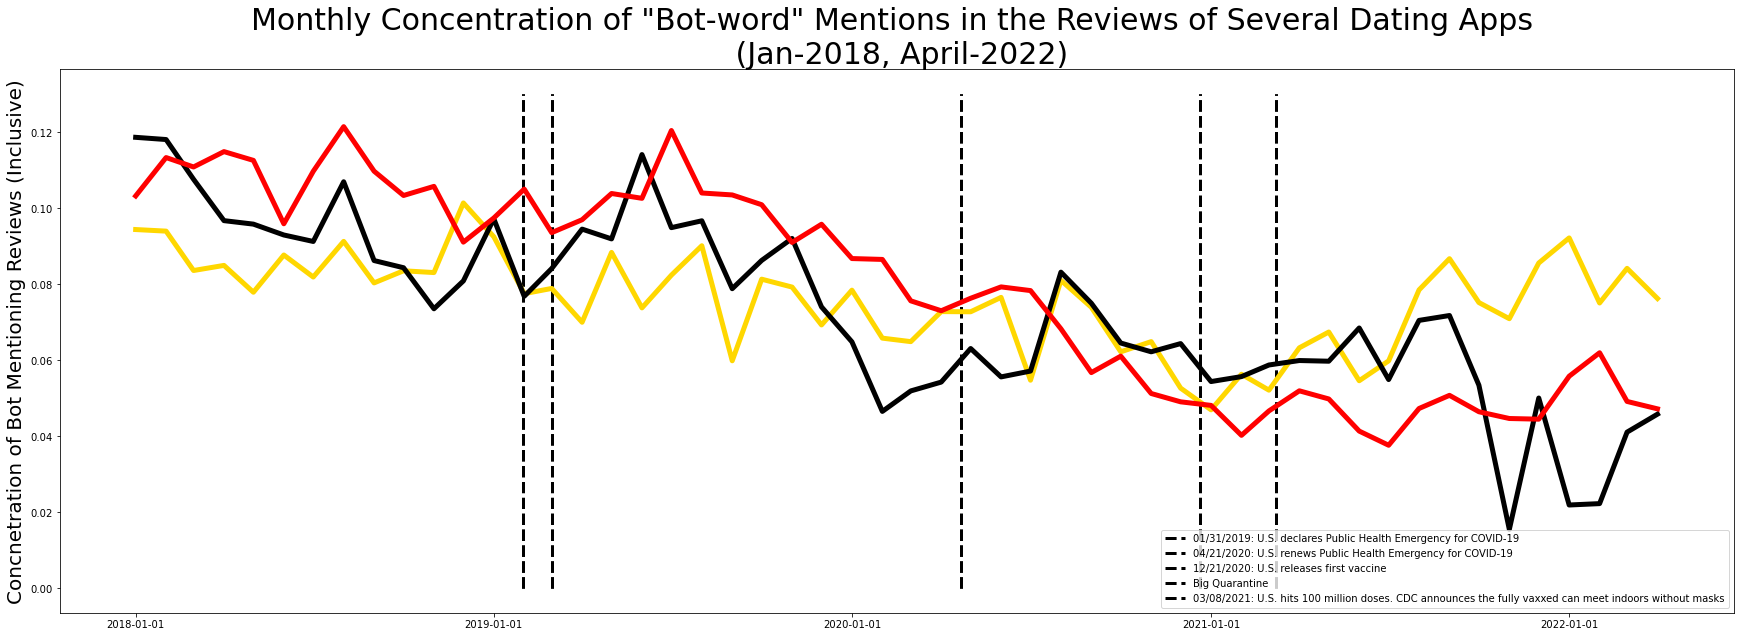

In [33]:
#Concentration of liberal bot mentions
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))

x = fun_2['month_year']
y = fun_2['bumble_bot']
y2 = fun_2['hinge_bot']
y3 = fun_2['tinder_bot']

bum_plot = ax.plot(x, y, color='gold',linewidth=5, label="Bumble bot mentions")
hing_plot = ax.plot(x, y2, color='black',linewidth=5,label="Hinge bot mentions")
tin_plot = ax.plot(x, y3, color='red',linewidth=5, label="Tinder bot mentions")

plt.legend( loc='upper left')

plt.ylabel("Concnetration of Bot Mentioning Reviews (Inclusive)", fontsize=20,color='black')

plt.xticks(['2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=10)

plt.title('Monthly Concentration of "Bot-word" Mentions in the Reviews of Several Dating Apps \n (Jan-2018, April-2022)', fontsize=30)

#important dates 

#vertical lines dates
x1 = np.datetime64("2019-01-31 00:00:00+00:00")
q = np.datetime64("2019-03-01 00:00:00+00:00")
x2 = np.datetime64("2020-04-21 00:00:00+00:00")
x3 = np.datetime64("2020-12-21 00:00:00+00:00")
x4 = np.datetime64("2021-03-08 00:00:00+00:00")

#US declares COVID emergency
x1_l = plt.vlines(x1, 0, 0.13, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.13, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x1, 0, 0.13, colors='black', label="01/31/2019: U.S. declares Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#big quarantine 
q_l = plt.vlines(q, 0, 0.13, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.13, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')
plt.vlines(q, 0, 0.13, colors='black', label="Big Quarantine",lw=3, 
              linestyles='dashed')

#renewed emergency call
x2_l = plt.vlines(x2, 0, 0.13, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.13, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')
plt.vlines(x2, 0, 0.13, colors='black', label="04/21/2020: U.S. renews Public Health Emergency for COVID-19",lw=3, 
              linestyles='dashed')

#vaccines drop first doses
x3_l = plt.vlines(x3, 0, 0.13, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.13, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')
plt.vlines(x3, 0, 0.13, colors='black', label="12/21/2020: U.S. releases first vaccine",lw=3, 
              linestyles='dashed')

#CDC announces fully vaxxed can meet inside without masks 
x4_l = plt.vlines(x4, 0, 0.13, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.13, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')
plt.vlines(x4, 0, 0.13, colors='black', label="03/08/2021: U.S. hits 100 million doses. CDC announces the fully vaxxed can meet indoors without masks",lw=3, 
              linestyles='dashed')

plt.legend(handles= [x1_l, x2_l, x3_l, q_l, x4_l], loc='lower right')


plt.show()

In [62]:
#Correlation
corr_output = pd.DataFrame(columns=['comp_sent','bot'])
for i in reviews:
    bot_and_sent = i.groupby("month_year")[['comp_sent','bot']].mean()
    corr_output = corr_output.append(bot_and_sent.corr())

In [63]:
corr_output = corr_output[corr_output.comp_sent != 1].drop(columns=['bot']).reset_index().rename(columns={'index':'app','comp_sent':'correlation'})
corr_output['app'] = ['bumble','hinge','tinder']

In [64]:
corr_output

,app,correlation
0,bumble,-0.611174
1,hinge,-0.727632
2,tinder,-0.908449


In [66]:
#Correlation
corr_output_2 = pd.DataFrame(columns=['comp_sent','liberal_bot'])
for i in reviews:
    bot_and_sent = i.groupby("month_year")[['comp_sent','liberal_bot']].mean()
    corr_output_2 = corr_output_2.append(bot_and_sent.corr())

In [68]:
corr_output_2 = corr_output_2[corr_output_2.comp_sent != 1].drop(columns=['liberal_bot']).reset_index().rename(columns={'index':'app','comp_sent':'correlation'})
corr_output_2['app'] = ['bumble','hinge','tinder']

In [69]:
corr_output_2

,app,correlation
0,bumble,-0.708173
1,hinge,-0.754735
2,tinder,-0.925087


In [102]:
dating_stop_words = stopwords.words('english')+['tinder','bumble','hinge','amp','app','get','like','im','far','bot','bots',"'"]
bot_reviews = [searched_bumble[searched_bumble['bot']==True],
searched_hinge[searched_hinge.bot == True],
searched_tinder[searched_tinder['bot']==True]]

vct = CountVectorizer(stop_words=dating_stop_words)
count = 0
all_apps = pd.DataFrame(columns=['word','count'])
for i in bot_reviews:
    Y = vct.fit_transform(list(i['clean_text']))

    dating_apps = ['bumble','hinge','tinder']

    word_counts_2 = pd.DataFrame(Y.sum(axis=0))

    word_counts_2.columns = vct.get_feature_names()
    word_counts_2 = word_counts_2.T

    word_counts_2 = word_counts_2[0].sort_values(ascending=False)
    print(dating_apps[count])
    count+=1
    all_apps = all_apps.append(word_counts_2.head(10).reset_index().rename(columns={'index':'word',0:'count'}))

bumble
hinge
tinder


In [103]:
all_apps

,word,count
0,dont,826
1,people,571
2,matches,467
3,even,463
4,match,439
5,women,436
6,bother,426
7,time,405
8,pay,349
9,one,339
